## Taxi Data Cleaning

CLeaning for the primary taxi dataset provided to us for this project. The data has been cleaned with a focus on maintaining pickup/dropoff data in order to best aid in creating predictive models for vehicle traffic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

#Read data frame from csv file
df = pd.read_csv('archive/2020_Yellow_Taxi_Trip_Data.csv', keep_default_na=True, delimiter=',', skipinitialspace=True, low_memory=False)

#Read size from csv
df.shape

(24648499, 18)

In [2]:
#Checking for duplicate values

df.duplicated().sum()

#given the amount of distinguishing feratures, and the comparatively miniscule amount of duplicated data (~12,000), the duplicated will be dropped out of an abundance of caution. 

df.drop_duplicates()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.20,1.0,N,238,239,1.0,6.00,3.0,0.5,1.47,0.00,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.20,1.0,N,239,238,1.0,7.00,3.0,0.5,1.50,0.00,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.60,1.0,N,238,238,1.0,6.00,3.0,0.5,1.00,0.00,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.80,1.0,N,238,151,1.0,5.50,0.5,0.5,1.36,0.00,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.00,1.0,N,193,193,2.0,3.50,0.5,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24648494,NaN,12/31/2020 11:44:35 PM,01/01/2021 12:01:22 AM,NaN,9.22,NaN,NaN,143,20,NaN,32.49,0.0,0.5,8.16,0.00,0.3,43.95,2.5
24648495,NaN,12/31/2020 11:41:36 PM,12/31/2020 11:50:32 PM,NaN,4.79,NaN,NaN,4,262,NaN,13.22,0.0,0.5,3.65,0.00,0.3,20.17,2.5
24648496,NaN,12/31/2020 11:01:17 PM,12/31/2020 11:40:37 PM,NaN,28.00,NaN,NaN,210,78,NaN,69.31,0.0,0.5,2.75,6.12,0.3,78.98,0.0
24648497,NaN,12/31/2020 11:31:29 PM,12/31/2020 11:44:22 PM,NaN,7.08,NaN,NaN,148,129,NaN,35.95,0.0,0.5,2.75,0.00,0.3,39.50,0.0


In [3]:
#Basic information on dataframe features and feature types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24648499 entries, 0 to 24648498
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 3.3+ GB


In [4]:
#columns relating to time and destination will be kept. All other columns will be considered extraneous and will be dropped. Judicious dropping of data has been made necessary by the massive size and computational load of the dataset

df = df[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'PULocationID', 'DOLocationID']]

In [5]:
#Splitting datetime into seperate day, month, year, and hour columns

#Converting to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], infer_datetime_format=True)

#Pickup
df['PUday'] = df['tpep_pickup_datetime'].dt.day
df['PUmonth'] = df['tpep_pickup_datetime'].dt.month
df['PUyear'] = df['tpep_pickup_datetime'].dt.year

#Converting to datetime
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], infer_datetime_format=True)

#Pickup
df['DOday'] = df['tpep_dropoff_datetime'].dt.day
df['DOmonth'] = df['tpep_dropoff_datetime'].dt.month
df['DOyear'] = df['tpep_dropoff_datetime'].dt.year

In [7]:
#Adding rows for the hours of the day using the new datetime feature

df['PUhour'] = df['tpep_pickup_datetime'].dt.hour
df['DOhour'] = df['tpep_dropoff_datetime'].dt.hour

In [8]:
#Printing the first and last 5 rows to check data formatting 

print("First 5 rows:")
print(df.head())
print("Last 5 rows:\n")
print(df.tail())

First 5 rows:
  tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  PULocationID  \
0  2020-01-01 00:28:15   2020-01-01 00:33:03              1.0           238   
1  2020-01-01 00:35:39   2020-01-01 00:43:04              1.0           239   
2  2020-01-01 00:47:41   2020-01-01 00:53:52              1.0           238   
3  2020-01-01 00:55:23   2020-01-01 01:00:14              1.0           238   
4  2020-01-01 00:01:58   2020-01-01 00:04:16              1.0           193   

   DOLocationID  PUday  PUmonth  PUyear  DOday  DOmonth  DOyear  PUhour  \
0           239      1        1    2020      1        1    2020       0   
1           238      1        1    2020      1        1    2020       0   
2           238      1        1    2020      1        1    2020       0   
3           151      1        1    2020      1        1    2020       0   
4           193      1        1    2020      1        1    2020       0   

   DOhour  
0       0  
1       0  
2       0  
3       1  


In [10]:
#Sorting categorical and continuous features

categorical = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'PUday', 'PUmonth', 'PUyear', 'PUhour', 'DOyear', 'DOmonth', 'DOday', 'DOhour']
continuous = ['passenger_count', 'PULocationID', 'DOLocationID']

In [11]:
#Checking for missing values

full = continuous + categorical

for item in full:
    percent_missing = df[item].isnull().sum() * 100 / len(df)
    print(percent_missing)

#Small amount of missing data in the pickup time. Not hugely relevant to measures. Will be adjusted to average pickup time or dropped.

3.284451519745685
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


array([[<AxesSubplot:title={'center':'tpep_pickup_datetime'}>,
        <AxesSubplot:title={'center':'DOLocationID'}>,
        <AxesSubplot:title={'center':'DOday'}>,
        <AxesSubplot:title={'center':'DOhour'}>],
       [<AxesSubplot:title={'center':'tpep_dropoff_datetime'}>,
        <AxesSubplot:title={'center':'PUday'}>,
        <AxesSubplot:title={'center':'DOmonth'}>, <AxesSubplot:>],
       [<AxesSubplot:title={'center':'passenger_count'}>,
        <AxesSubplot:title={'center':'PUmonth'}>,
        <AxesSubplot:title={'center':'DOyear'}>, <AxesSubplot:>],
       [<AxesSubplot:title={'center':'PULocationID'}>,
        <AxesSubplot:title={'center':'PUyear'}>,
        <AxesSubplot:title={'center':'PUhour'}>, <AxesSubplot:>]],
      dtype=object)

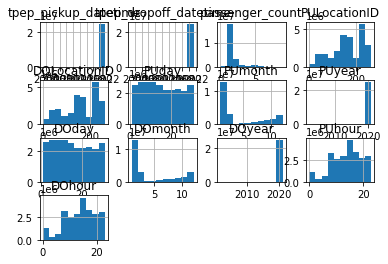

In [12]:
#Plot histograms for continuous features

df.hist().T

In [ ]:
#Plot bar plots for categorical features
#unfortunaterly, trying to graph these features breaks my computer at the moment

#for item in categorical:
    #df[item].value_counts(dropna=False).plot(kind='bar', title=item)
    #plt.show()

In [10]:
#printing unique pickup taxi zones for reference:

print(sorted(df['PULocationID'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 22

In [11]:
#printing unique dropoff taxi zones for reference:

print(sorted(df['DOLocationID'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 22

In [13]:
#Saving cleaned frame to CSV

df.to_csv('cleaned_taxi_df.csv', index=False)